
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

    1. Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
    3. Plot bar charts showing impact of employee salaries on retention
    4. Plot bar charts showing corelation between department and employee retention
    5. Now build logistic regression model using variables that were narrowed down in step 1
    6. Measure the accuracy of the model

In [60]:
import pandas as pd
df = pd.read_csv('Datasets\\HR_comma_sep.csv')
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
12471,0.44,0.53,2,149,3,0,1,0,sales,low
5207,0.94,0.59,3,137,2,0,0,0,sales,medium
12845,0.56,0.99,4,230,3,0,0,0,sales,high
12821,0.19,0.58,4,173,5,0,0,0,accounting,medium
4969,0.89,0.88,3,165,4,0,0,0,sales,medium
9035,0.65,0.54,4,191,4,0,0,0,accounting,medium
1685,0.76,0.98,5,242,5,0,1,0,management,low
1441,0.11,0.83,7,255,5,0,1,0,product_mng,medium
3783,0.85,0.55,4,233,2,1,0,0,technical,low
11655,0.56,0.71,5,244,3,0,0,0,product_mng,low


In [61]:
y = df.left
df = df.drop('left', axis = 1)
X = df


Now, let's convert department and salary column using encoders

In [62]:
dept_dummies = pd.get_dummies(X['Department'], prefix = 'Dept', drop_first= True)
df = pd.concat([df, dept_dummies], axis = 1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical
0,0.38,0.53,2,157,3,0,0,sales,low,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,sales,medium,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,sales,medium,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,sales,low,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,sales,low,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,0,support,low,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,0,support,low,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,0,support,low,False,False,False,False,False,False,False,True,False


In [63]:
from sklearn.preprocessing import OrdinalEncoder

le = OrdinalEncoder()
X['salary'] = le.fit_transform(X[['salary']])
X['salary'] = X['salary'].astype(int)
X['salary']

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: salary, Length: 14999, dtype: int64

In [64]:
X.drop('Department', axis= 1, inplace= True)


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
y_train_pred = logreg.predict(X_train)
y_train_pred

array([0, 1, 0, ..., 0, 0, 0], shape=(11999,))

In [68]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

accuracy = accuracy_score(y_train,y_train_pred)
print(f'Accuracy: {accuracy:.2f}')
F1_score = f1_score(y_train, y_train_pred)
print(f'\nF1 Score: {F1_score:.2f}')
conf_mat = confusion_matrix(y_train, y_train_pred)
print(f'\nConfusion Matrix:\n {conf_mat}')
class_report = classification_report(y_train, y_train_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.77

F1 Score: 0.35

Confusion Matrix:
 [[8475  659]
 [2121  744]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      9134
           1       0.53      0.26      0.35      2865

    accuracy                           0.77     11999
   macro avg       0.67      0.59      0.60     11999
weighted avg       0.74      0.77      0.74     11999



Overall the metrics are not Satisfactory

SMOTE (Synthetic Minority Oversampling Technique)
To improve the results further, we can use SMOTE to balance the dataset by oversampling the minority class (1). SMOTE generates synthetic samples for the minority class, helping the model learn more patterns for class 1 without losing data from class 0.

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smoted, y_train_smoted = smote.fit_resample(X_train, y_train)
X_train_smoted.shape, y_train_smoted.shape

((18268, 8), (18268,))

In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_smoted, y_train_smoted)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
y_train_smoted_pred = model.predict(X_train_smoted)
y_train_smoted_pred

array([0, 1, 0, ..., 1, 1, 1], shape=(18268,))

In [72]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

accuracy = accuracy_score(y_train_smoted,y_train_smoted_pred)
print(f'Accuracy: {accuracy:.2f}')
F1_score = f1_score(y_train_smoted,y_train_smoted_pred)
print(f'\nF1 Score: {F1_score:.2f}')
conf_mat = confusion_matrix(y_train_smoted,y_train_smoted_pred)
print(f'\nConfusion Matrix:\n {conf_mat}')
class_report = classification_report(y_train_smoted,y_train_smoted_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.75

F1 Score: 0.76

Confusion Matrix:
 [[6735 2399]
 [2082 7052]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      9134
           1       0.75      0.77      0.76      9134

    accuracy                           0.75     18268
   macro avg       0.76      0.75      0.75     18268
weighted avg       0.76      0.75      0.75     18268



Still the accuracy is not as expected so let's use Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

In [84]:
rf_model.fit(X_train_smoted, y_train_smoted)

RandomForestClassifier()

In [88]:
y_test_pred = rf_model.predict(X_test)

In [89]:

acc_test = rf_model.score(X_test, y_test)
conf_mat_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)
print(f"Testing Accuracy: {acc_test:.2f}", end='\n\nn')
print("Confusion Matrix:", end = '\n')
print(conf_mat_test, end='\n\n')
print("Classification Report (Testing):")
print(class_report_test)

Testing Accuracy: 0.99

nConfusion Matrix:
[[2278   16]
 [  26  680]]

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



Let's try with XGBOOST 

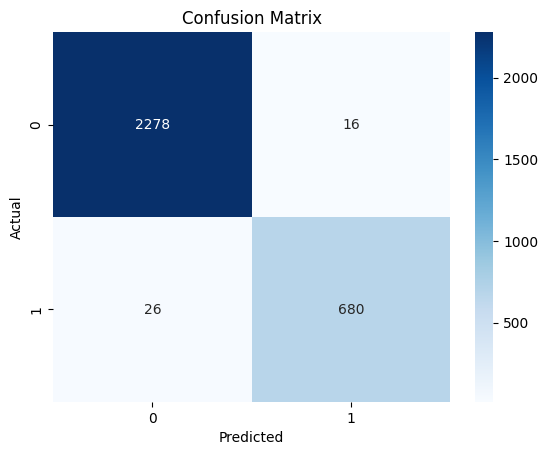

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_mat_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Let's try with XGBoost

In [78]:
import xgboost as xgb

In [79]:
xgb_model = xgb.XGBClassifier()


In [80]:
xgb_model.fit(X_train_smoted, y_train_smoted)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [81]:
y_test_pred_xgb = xgb_model.predict(X_test)


Testing Accuracy (XGBoost): 0.99

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.97      0.97      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



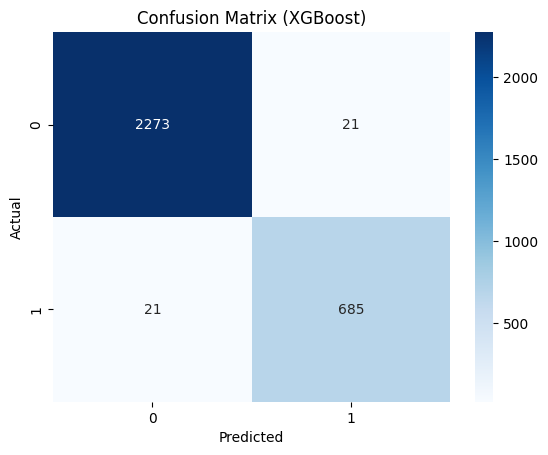

In [82]:
acc_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"Testing Accuracy (XGBoost): {acc_test_xgb:.2f}", end='\n\n')
clss_report_xgb = classification_report(y_test, y_test_pred_xgb)
print('Classification Report (XGBoost):')
print(clss_report_xgb)
conf_mat_xgb = confusion_matrix(y_test, y_test_pred_xgb)
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()